In [181]:
import pandas as pd

# Ruta al archivo CSV
#file_path = 'https://github.com/ravellom/AI_Lit_Test_Analysis/raw/main/descarga_GF_20.3.24_5.csv'
file_path = 'descarga_GF_20.3.24_8.csv'

#file_path = "datasets/ai_test.csv"

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path, encoding='utf-8')

# Eliminar la columna "Timestamp" y Unname
df.drop(columns=["Timestamp"], inplace=True)
#df.drop(columns=["Unnamed: 0"], inplace=True)


In [ ]:
print(df.head())

In [182]:
# Renombrar columnas
df.rename(columns={
    "Género": "Género",
    "Por favor, indique su máximo nivel de formación académica completado:": "Nivel Académico",
    "Ocupación":"Ocupación",
    "En caso de ser estudiante ¿está usted matriculado en alguno de los siguientes niveles educativos?": "Estudiante_nivel",
    "¿Cuál de las siguientes categorías describe mejor su área o campo de estudio o trabajo actual? Por favor, seleccione una opción:": "Campo de estudio",
}, inplace=True)



In [183]:
# Recodificar valores de las preguntas generales

# Ajustar los nombres de las categorías para "Nivel Académico"
nivel_academico_map = {
    "Educación universitaria de pregrado (licenciatura o equivalente)": "Pregrado",
    "Educación universitaria de posgrado (maestría o equivalente)": "Posgrado",
    # Añade aquí los demás mapeos necesarios
}
df['Nivel Académico'] = df['Nivel Académico'].map(nivel_academico_map).fillna(df['Nivel Académico'])

In [ ]:
print(df.head())

In [ ]:
import plotly.express as px

# Gráfico de pastel para "Género"
fig_genero = px.pie(df, names='Género', title="Distribución de Género")
fig_genero.update_traces(textposition='inside', textinfo='percent+label')
fig_genero.update_layout(legend=dict(title='Género', orientation="v", y=0.5, x=1.25))

# Gráfico de pastel para "Nivel Académico"
fig_nivel_academico = px.pie(df, names='Nivel Académico', title="Distribución de Nivel Académico")
fig_nivel_academico.update_traces(textposition='inside', textinfo='percent+label')
fig_nivel_academico.update_layout(legend=dict(title='Nivel Académico', orientation="v", y=0.5, x=1.25))

# Gráfico de pastel para "Cursando"
fig_cursando = px.pie(df, names='Ocupación', title="Distribución de Ocupación")
fig_cursando.update_traces(textposition='inside', textinfo='percent+label')
fig_cursando.update_layout(legend=dict(title='Cursando', orientation="v", y=0.5, x=1.25))

# Mostrar los gráficos
fig_genero.show()
fig_nivel_academico.show()
fig_cursando.show()

In [ ]:
df.columns

In [184]:
# Asumiendo que las primeras tres columnas no son parte de las 30 preguntas y la 31ª es una pregunta abierta
columnas_preguntas = df.columns[5:35]  # Seleccionar solo hasta la 30ª pregunta
nuevas_columnas = {col: f"Item{str(index+1).zfill(2)}" for index, col in enumerate(columnas_preguntas)}

# Agregar la última pregunta como "Pregunta abierta"
nuevas_columnas[df.columns[-1]] = "Pregunta abierta"

# Renombrar las columnas en el DataFrame
df.rename(columns=nuevas_columnas, inplace=True)

df.fillna("No responde", inplace=True)

# Verificar los cambios realizados
print(df.columns)

Index(['Género', 'Nivel Académico', 'Ocupación', 'Estudiante_nivel',
       'Campo de estudio', 'Item01', 'Item02', 'Item03', 'Item04', 'Item05',
       'Item06', 'Item07', 'Item08', 'Item09', 'Item10', 'Item11', 'Item12',
       'Item13', 'Item14', 'Item15', 'Item16', 'Item17', 'Item18', 'Item19',
       'Item20', 'Item21', 'Item22', 'Item23', 'Item24', 'Item25', 'Item26',
       'Item27', 'Item28', 'Item29', 'Item30', 'Pregunta abierta'],
      dtype='object')


In [185]:
# Ruta al archivo CSV modificado
file_path = 'https://github.com/ravellom/AI_Lit_Test_Analysis/raw/main/respuestas_correctas_items.csv'

# Cargar el CSV en un DataFrame
df_correct = pd.read_csv(file_path)

# Visualizar las primeras filas del DataFrame para confirmar
print(df_correct.head())

     Item                                 Respuesta Correcta
0  Item01        Detección de fraude con tarjetas de crédito
1  Item02  Haz un comentario irónico, porque esto es mejo...
2  Item03                  Sistemas de gestión de inventario
3  Item04                 Procesamiento del Lenguaje Natural
4  Item05  La IA actúa racionalmente para lograr un objet...


In [186]:
# Asumiendo que 'df' es tu DataFrame original con las respuestas de los encuestados
# y 'df_correct' es el DataFrame que contiene las respuestas correctas

# Primero, asegúrate de que el índice del DataFrame de respuestas correctas se alinea con los ítems
df_correct.set_index('Item', inplace=True)

# Ahora, iteramos sobre cada columna de ítems en el DataFrame original para comparar y asignar valores
for item in df_correct.index:
    correct_answer = df_correct.loc[item, 'Respuesta Correcta']
    if item != 'Item17':
        # Comparar la respuesta del encuestado con la respuesta correcta y asignar 0 o 1
        df[item] = df[item].apply(lambda x: "No responde" if x == "No responde" else (1 if x == correct_answer else 0))
    else:
        # Para el ítem 17, extraer solo los dígitos de la respuesta y comparar la secuencia con la correcta
        df[item] = df[item].apply(lambda x: "No responde" if x == "No responde" else (1 if ''.join(filter(str.isdigit, str(x))) == correct_answer else 0))


In [187]:
# Verificar el DataFrame resultante
df.iloc[:, 5:35]

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,...,Item21,Item22,Item23,Item24,Item25,Item26,Item27,Item28,Item29,Item30
0,0,0,1,No responde,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,1,1,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,1,1,0,0,0,1,1,1,0,1
3,0,0,0,0,1,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4,No responde,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0,0,0,1,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
219,1,0,0,0,1,1,0,0,No responde,1,...,0,0,1,0,No responde,0,0,1,0,0
220,0,1,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,0,1,0,0
221,0,0,0,0,0,1,No responde,0,0,0,...,1,0,0,0,1,1,0,1,0,0


In [188]:
# Elimiar las observaciones con más del 25% de "no responde"

# Paso 1: Calcular el umbral de "No responde" para cada fila en las columnas de interés
# Dado que son 30 items, el 25% de 30 es 7.5. Entonces, cualquier fila con más de 7.5 respuestas "No responde" será eliminada.
# En práctica, más de 7 respuestas "No responde" para superar el umbral, por lo que usamos 7 como umbral entero.
umbral_no_responde = 5

# Paso 2: Contar "No responde" en las columnas de interés por fila y filtrar el DataFrame
# Aquí seleccionamos las columnas de interés, comparamos cada celda con "No responde",
# sumamos esos valores por fila, y filtramos basándonos en el umbral
df_filtrado_No_Resp = df[(df.iloc[:, 5:35] == "No responde").sum(axis=1) <= umbral_no_responde]


In [189]:
df_filtrado_No_Resp.shape

(211, 36)

In [190]:
# Sustituir "No responde" x 0

df_filtrado_0 = df_filtrado_No_Resp.replace("No responde", 0)



In [191]:
#df.to_csv("correcto_final.csv")

#df_filtrado_No_Resp.to_excel("correcto_No_Resp4.xlsx")

df_filtrado_0.to_excel("correcto_0_14.xlsx")

#from google.colab import files

# Descargar el archivo al sistema local
#files.download("correcto_217_0_9.xlsx")

In [ ]:
# Sumar las respuestas correctas para cada sujeto (fila)
df['Total Respuestas Correctas'] = df.loc[:, 'Item01':'Item30'].sum(axis=1)

# Aplicar estilos para una mejor visualización
df[['Total Respuestas Correctas']].style.set_properties(**{'background-color': 'black', 'color': 'lime', 'border-color': 'white'})

<ipython-input-28-3dd0e125b838>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total Respuestas Correctas'] = df.loc[:, 'Item01':'Item30'].sum(axis=1)


,Total Respuestas Correctas
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


C:\Users\ravel\AppData\Local\Temp\ipykernel_21268\1694447320.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



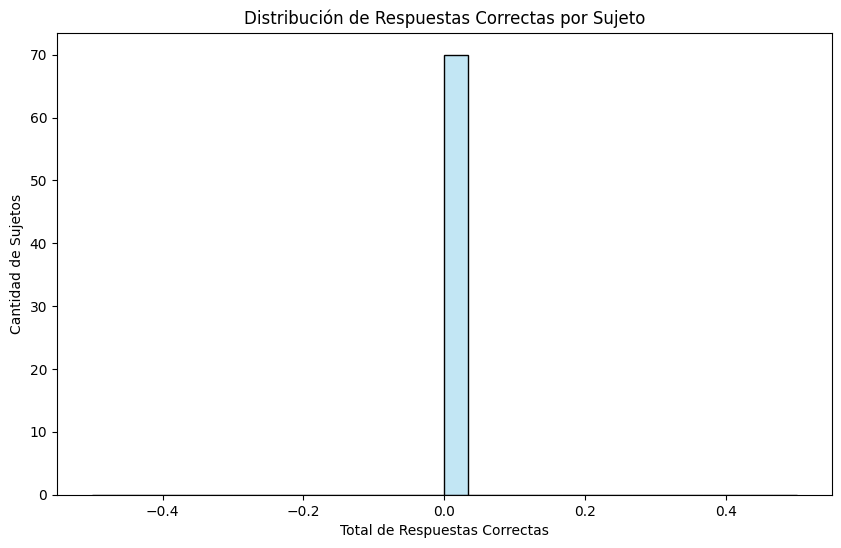

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' es tu DataFrame ya actualizado con 0 y 1 para respuestas incorrectas y correctas, respectivamente

# Sumar las respuestas correctas para cada sujeto para obtener un total por sujeto
df['Total Correctas'] = df.iloc[:, 1:].sum(axis=1)  # Ajusta el rango de columnas según sea necesario

# Crear un gráfico de la distribución de los totales de respuestas correctas
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Correctas'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Respuestas Correctas por Sujeto')
plt.xlabel('Total de Respuestas Correctas')
plt.ylabel('Cantidad de Sujetos')
plt.show()